## Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import statsmodels.api as sm
import math
from pyramid.arima import auto_arima
# import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 12
pd.set_option('display.max_rows',10000)

## Fetching Data

In [2]:
data = pd.read_csv("candy_production.csv")

In [3]:
# Verifying
data.head(20)

,observation_date,IPG3113N
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100
5,1972-06-01,67.6467
6,1972-07-01,69.0429
7,1972-08-01,70.8370
8,1972-09-01,75.0462
9,1972-10-01,106.9289


## Data Preprocessing

* __Lets have a look at column names__

In [4]:
data.columns

Index(['observation_date', 'IPG3113N'], dtype='object')

* __Changing column name for the sake of easablity__

In [5]:
data.rename(columns={'IPG3113N':'production'}, inplace=True)
# Verifying
data.head()

,observation_date,production
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


* __For the sake of easability, i need to change the name of the column from "observation_date" to "Date"__

In [6]:
data.rename(columns={'observation_date':'date'}, inplace=True)

* __Lets check weather we have NaN values in our data or not__

In [7]:
np.unique(data.date.isnull())

array([False])

In [8]:
np.unique(data.date.isnull())

array([False])

    No null or nan value is observed in the data

## Exploratory data analysis

__Basic Descriptive Exploration__

* __What is the shape of our data__

In [9]:
data.shape

(548, 2)

    We have 548 Rows and 2 Columns

* __Some basic information of our data__

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
date          548 non-null object
production    548 non-null float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


__Univariate analysis__

 Column: observastion_date

* __Lets have a look to data__

In [11]:
data.date.head(10)

0    1972-01-01
1    1972-02-01
2    1972-03-01
3    1972-04-01
4    1972-05-01
5    1972-06-01
6    1972-07-01
7    1972-08-01
8    1972-09-01
9    1972-10-01
Name: date, dtype: object

* __Lets see some basic decription of the observation_date column__

In [12]:
data.date.describe()

count            548
unique           548
top       2012-04-01
freq               1
Name: date, dtype: object

* __What is the datatype of this column__

In [13]:
data.dtypes

date           object
production    float64
dtype: object

In [14]:
data.date.dtypes

dtype('O')

    This shows that the data type of this column is 'Object'

* __We need to change the datatype of this column for future usability (transformation, visualizations, modeling) from object to datetime__

In [15]:
data.date = pd.to_datetime(data.date)
# verification
data.dtypes

date          datetime64[ns]
production           float64
dtype: object

In [16]:
data.head()

,date,production
0,1972-01-01,85.6945
1,1972-02-01,71.8200
2,1972-03-01,66.0229
3,1972-04-01,64.5645
4,1972-05-01,65.0100


* __Minimum/Starting date__

In [17]:
data.date.min()

Timestamp('1972-01-01 00:00:00')

* __Maximum/Ending date__

In [18]:
data.date.max()

Timestamp('2017-08-01 00:00:00')

__Univariate analysis__

 Column: Production

* __Lets have a look to data__

In [19]:
data.production.head(10)

0     85.6945
1     71.8200
2     66.0229
3     64.5645
4     65.0100
5     67.6467
6     69.0429
7     70.8370
8     75.0462
9    106.9289
Name: production, dtype: float64

* __Lets see some basic decription of the 'Production' column__

In [20]:
data.production.describe()

count    548.000000
mean     100.662524
std       18.052931
min       50.668900
25%       87.862475
50%      102.278550
75%      114.691900
max      139.915300
Name: production, dtype: float64

* __What is the datatype of this column__

In [21]:
data.dtypes

date          datetime64[ns]
production           float64
dtype: object

* __Visualizing the data for better understanding__ 

    Histogram

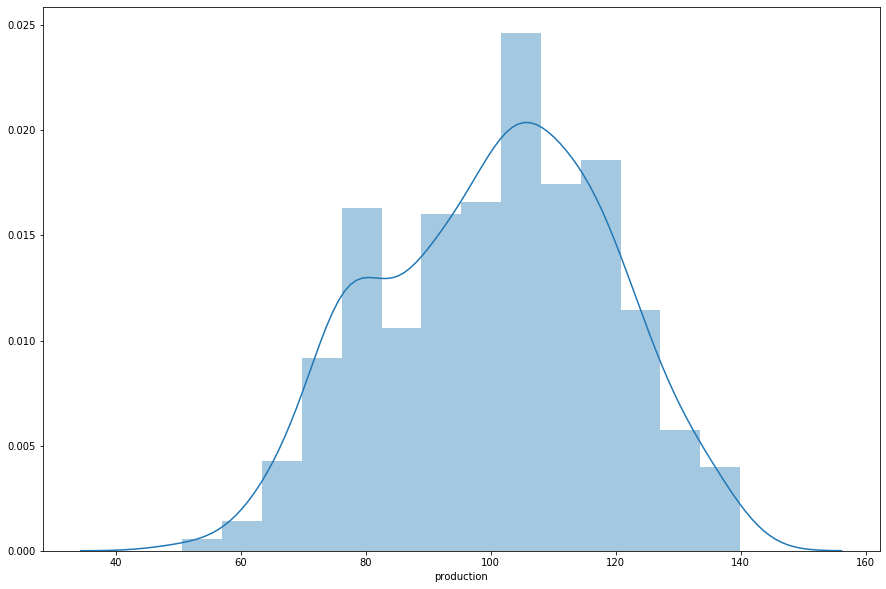

In [22]:
plt.figure(figsize=(15,10))
sns.distplot(data.production)

    Boxplot

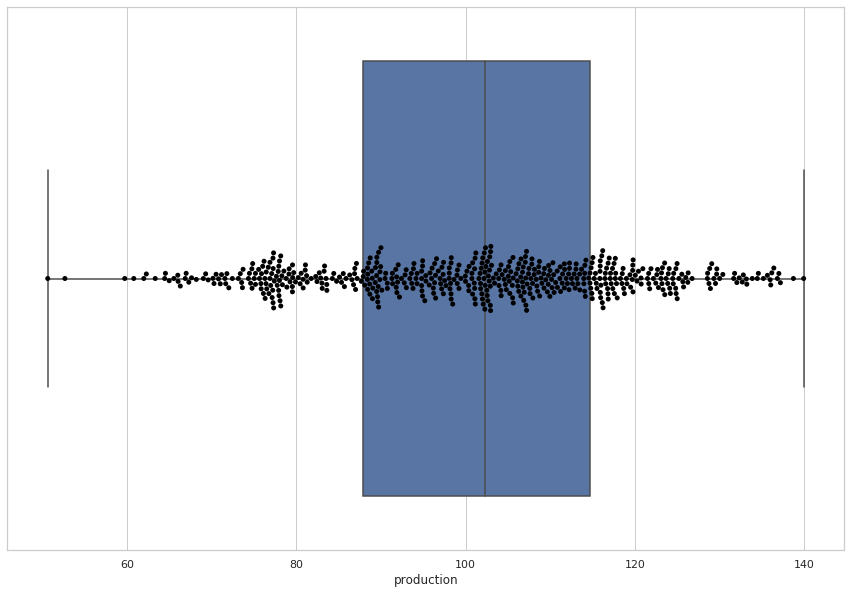

In [23]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid", color_codes='denim blue')
ax = sns.boxplot(x=data["production"])
ax = sns.swarmplot(x=data["production"], color='black')

__Bivariate analysis__

/home/arsal/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


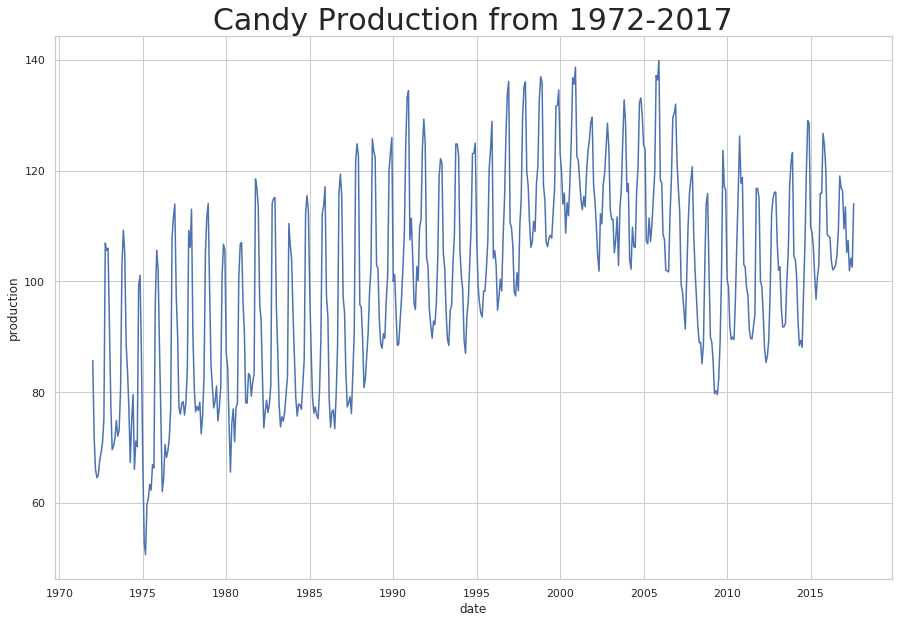

In [24]:
plt.figure(figsize=(15,10))
plt.title('Candy Production from 1972-2017', fontsize=30)
ax = sns.lineplot(x="date", y="production", data=data)

## Data Transformation

* __Making "observation_date" column as an index__

In [25]:
data.set_index(data.date, inplace=True)
# Verification
data.head()

,date,production
date,,
1972-01-01,1972-01-01,85.6945
1972-02-01,1972-02-01,71.8200
1972-03-01,1972-03-01,66.0229
1972-04-01,1972-04-01,64.5645
1972-05-01,1972-05-01,65.0100


* __As we have "observation_date" column twice, one as an index and second as a column. So we need to remove the column one__

In [26]:
data.drop(columns=['date'], axis=1, inplace=True)
# Verification
data.head()

,production
date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


* __Looking at our time series there is an interesting trend that may be fixed with a square root transform if not for the large dip around 2007-2008. This trend is the result of business cycles and other exongenous variables that effect economic data. We can use a box-cox transformation to remove the trend. Next we can dif the time series to deal with trend and plot both that result, and the resulting ACF and PACF graph that it creates.__


     __Box Cox Transformation__

     The box cox transformation makes non-normal data normally distributed. We can pass it an argument for lambda to automatically perform a log transform, square root transform, or reciprocal transform. If we pass no argument for lambda it will tune automatically and return a lambda value.

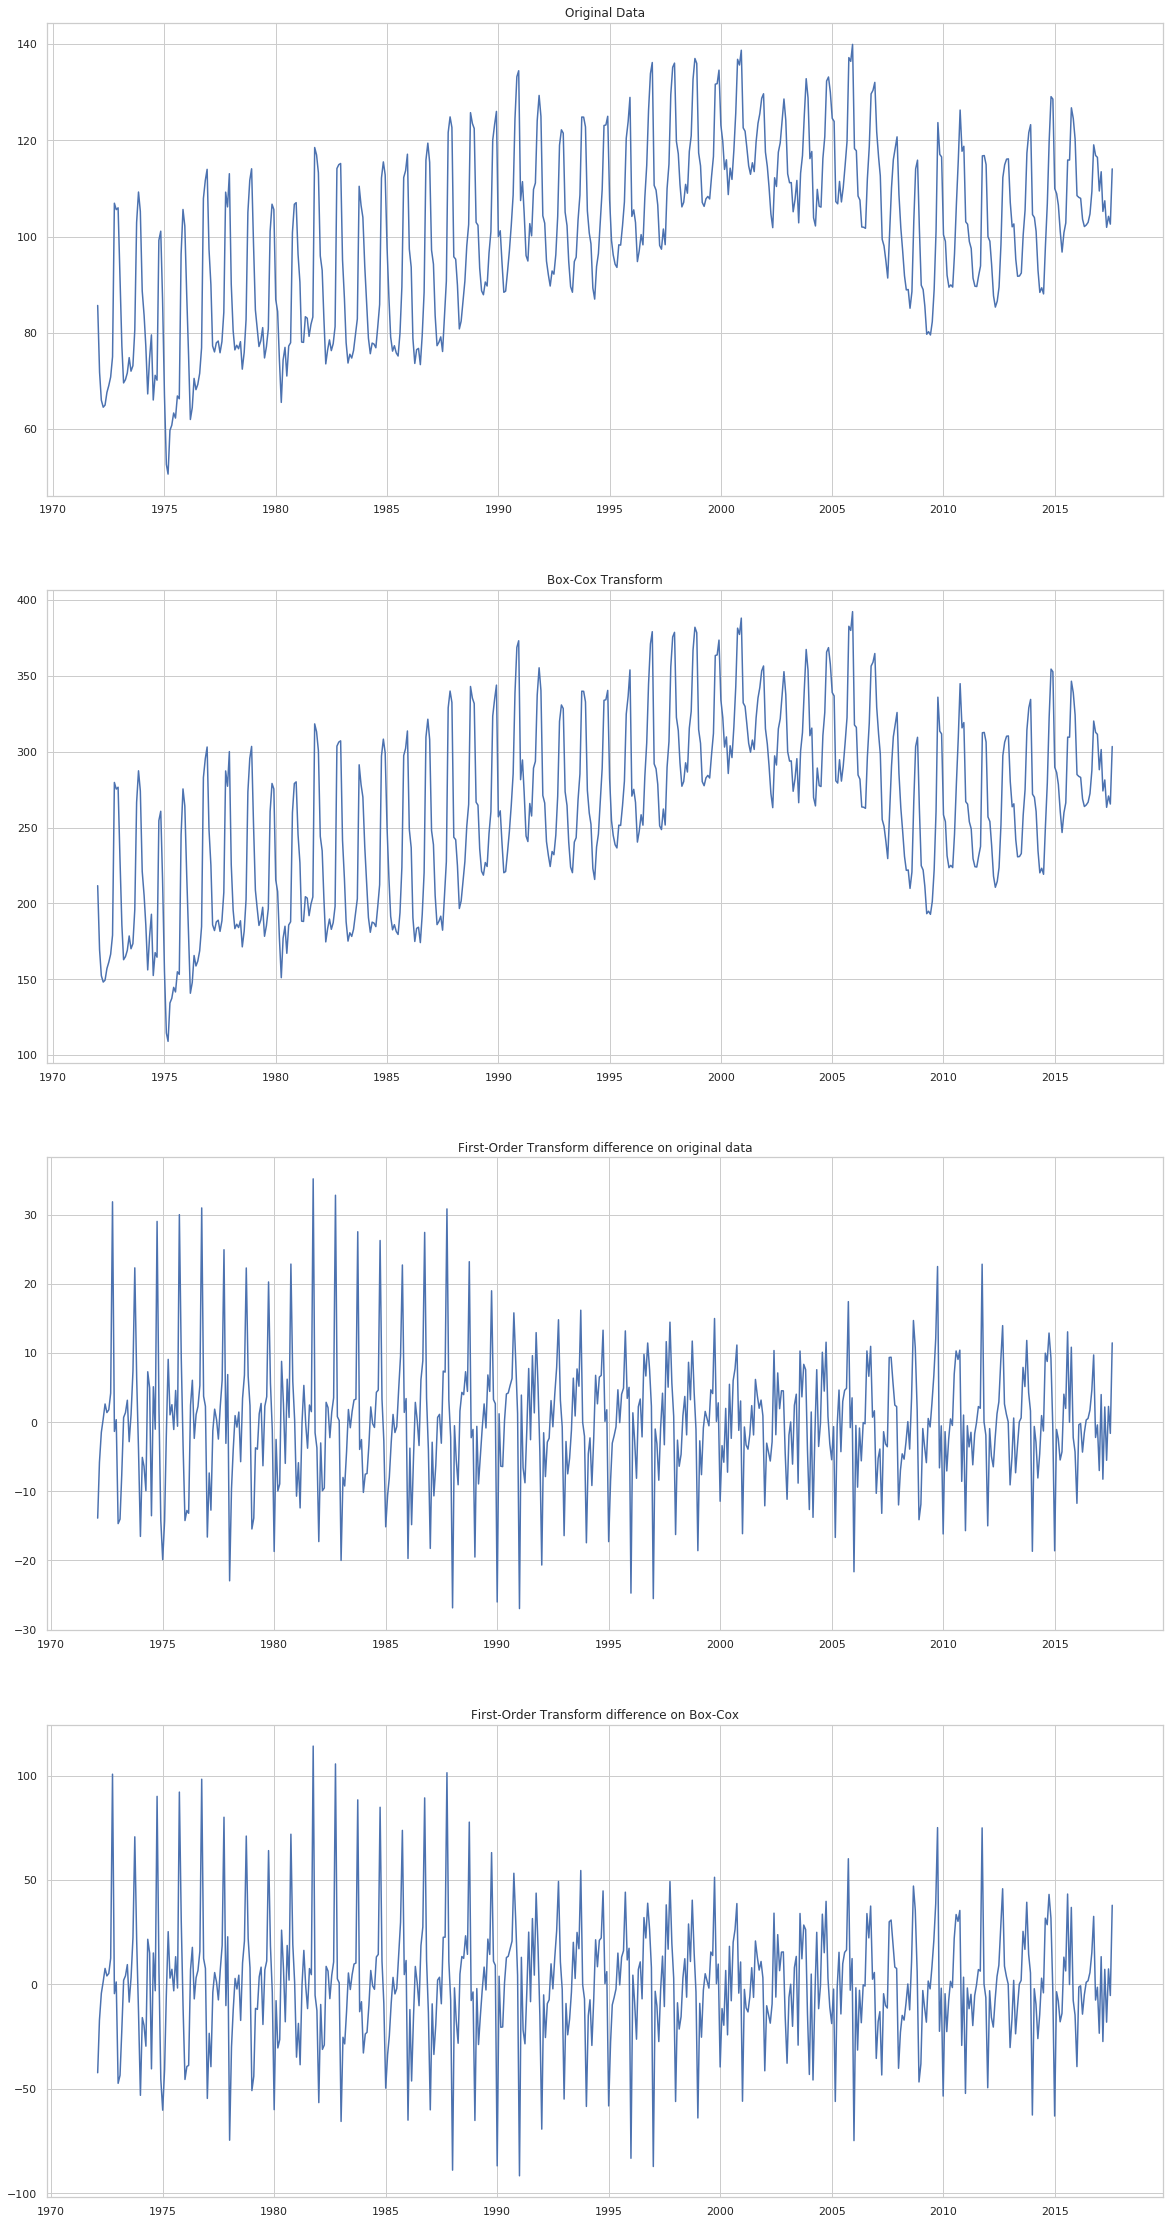

In [27]:
data['boxcox_production'], lamb = boxcox(data.production)
data['diff_bcox_production'] = data['boxcox_production'].diff()
data['diff_production'] = data['production'].diff()
fig = plt.figure(figsize=(20,40))

orig = plt.subplot(411)
orig.plot(data.production)
orig.title.set_text('Original Data')
bcox = plt.subplot(412)
bcox.plot(data.boxcox_production)
bcox.title.set_text('Box-Cox Transform')
diff_prod = plt.subplot(413)
diff_prod.plot(data.diff_production)
diff_prod.title.set_text('First-Order Transform difference on original data')
diff_bcox_prod = plt.subplot(414)
diff_bcox_prod.plot(data.diff_bcox_production)
diff_bcox_prod.title.set_text('First-Order Transform difference on Box-Cox')

data.boxcox_production.dropna(inplace=True)
data.diff_production.dropna(inplace=True)
data.diff_bcox_production.dropna(inplace=True)

* __Stationartiy Testing using "moving average", "moving std" and "dickey fuller test"__

In [28]:
def test_stationarity(timeseries, column_name, lbl):
    
    #Determine rolling statistics
    movingAverage = timeseries[column_name].rolling(window=50).mean()
    movingSTD = timeseries[column_name].rolling(window=50).std()
    
    #Plot rolling statistics
    plt.figure(figsize=(15,11))
    orig = plt.plot(timeseries[column_name], color='blue', label=lbl)
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries[column_name], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

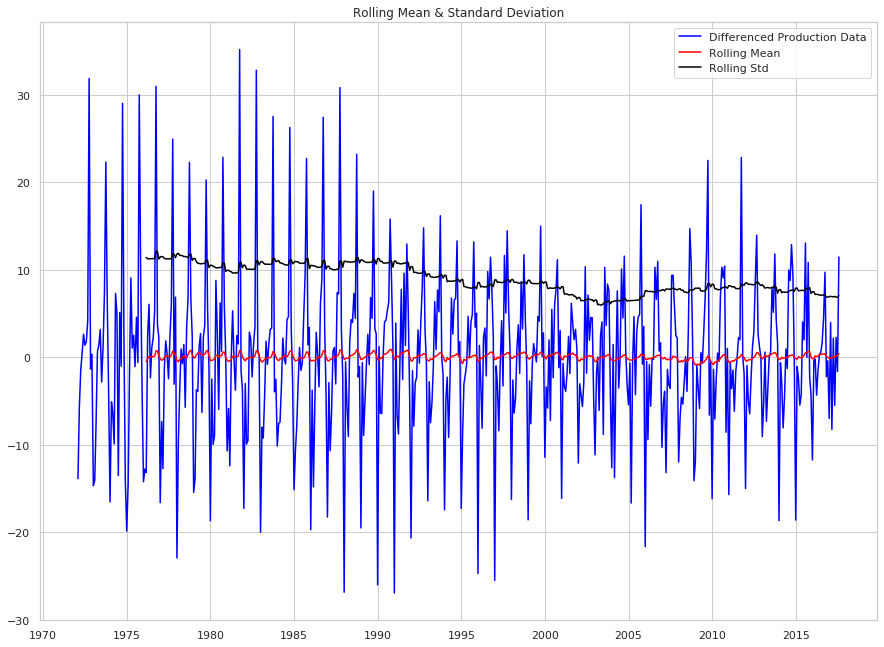

Results of Dickey Fuller Test:
Test Statistic                -6.119512e+00
p-value                        8.925584e-08
#Lags Used                     1.300000e+01
Number of Observations Used    5.330000e+02
Critical Value (1%)           -3.442678e+00
Critical Value (5%)           -2.866978e+00
Critical Value (10%)          -2.569666e+00
dtype: float64


In [29]:
test_stationarity(data,'diff_production', 'Differenced Production Data')

In [30]:
data.columns

Index(['production', 'boxcox_production', 'diff_bcox_production',
       'diff_production'],
      dtype='object')

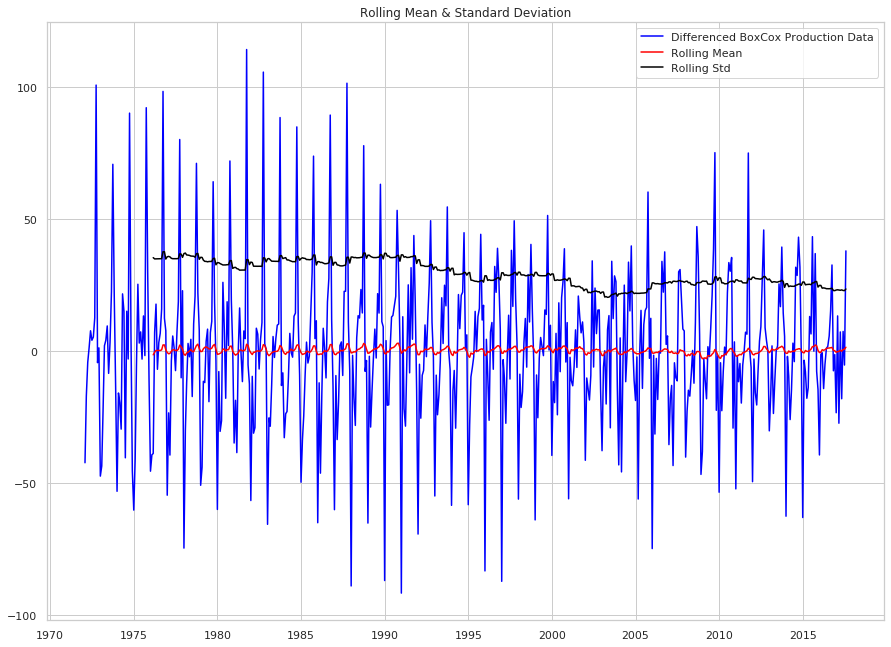

Results of Dickey Fuller Test:
Test Statistic                -6.185969e+00
p-value                        6.288379e-08
#Lags Used                     1.300000e+01
Number of Observations Used    5.330000e+02
Critical Value (1%)           -3.442678e+00
Critical Value (5%)           -2.866978e+00
Critical Value (10%)          -2.569666e+00
dtype: float64


In [31]:
test_stationarity(data, 'diff_bcox_production', 'Differenced BoxCox Production Data')

* __Plotting ACF and PACF__

<Figure size 1080x1152 with 0 Axes>

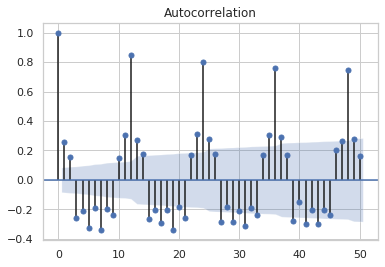

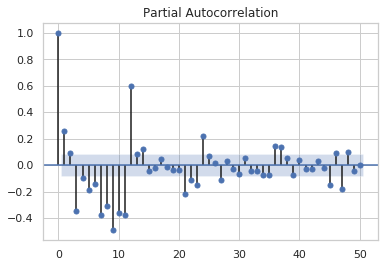

In [42]:
plot_acf(data.diff_production, lags=50)
plot_pacf(data.diff_production, lags=50, method='ols')
pyplot.show()

## Aplying SARIMAX

* __Spliting Data__

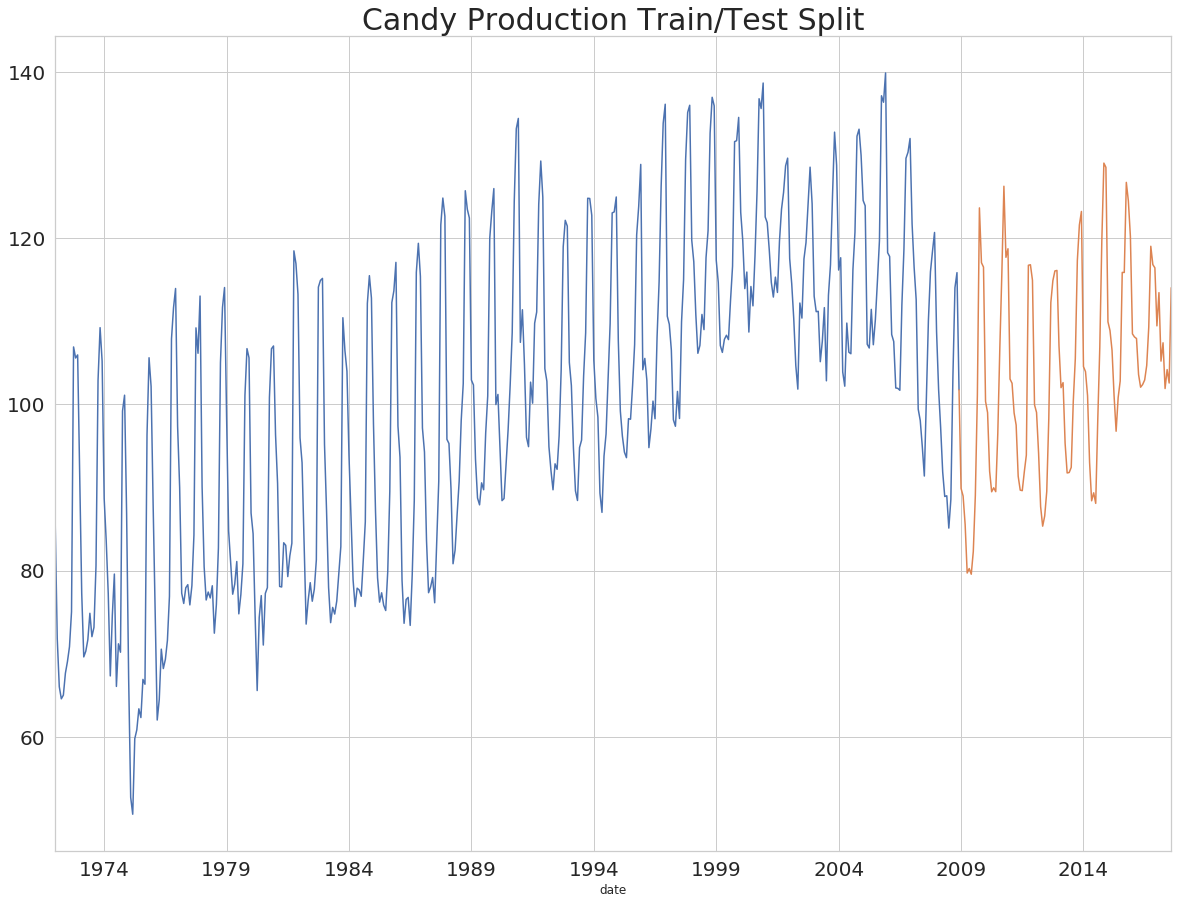

In [33]:
split_date = '2008-12-01'
train = data['production'].loc[:split_date]
test = data['production'].loc[split_date:]
train.plot(figsize=(20, 15), fontsize=20)
plt.title('Candy Production Train/Test Split', fontsize=30)
test.plot()
plt.show()

* __Appliying Model__

In [34]:
model = sm.tsa.statespace.SARIMAX(train, freq='MS', order=(1, 1, 1), seasonal_order=(1, 0, 0, 12))
model_fit = model.fit(disp=False)

* __Model Accuracy Measure__

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

Mean Squared Error: 188.39860458413872
Root Mean Squared Error: 13.725837117791349
Mean Absolute Error: 11.377112813420956


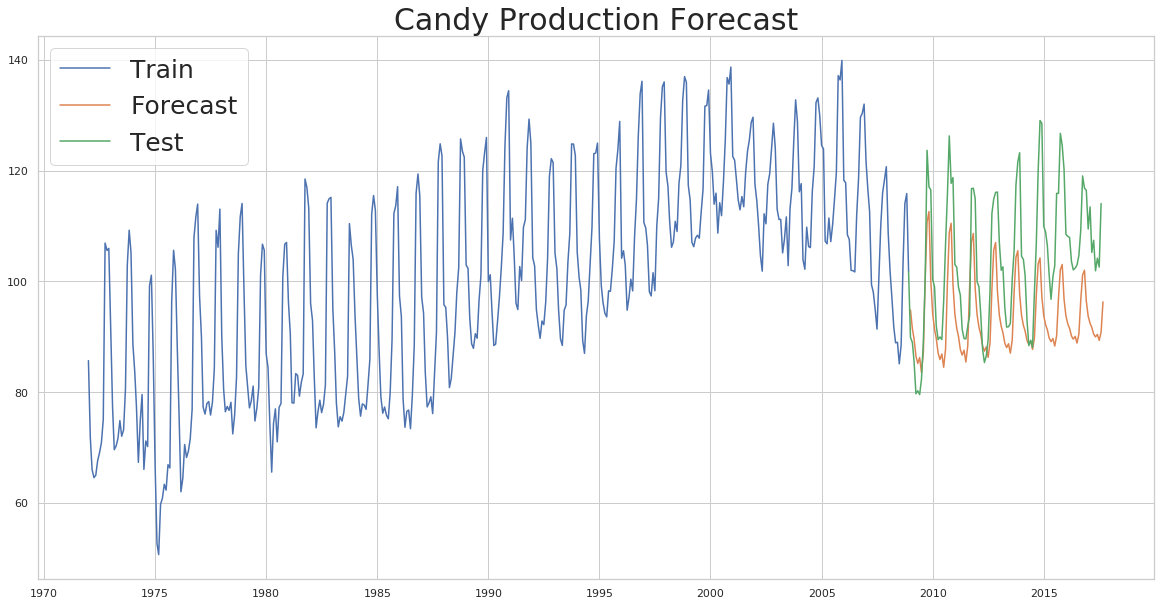

In [36]:
fcast_len = len(test)
fcast = model_fit.forecast(fcast_len)
mse = mean_squared_error(test, fcast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, fcast)
plt.figure(figsize=(20, 10))
plt.title('Candy Production Forecast', fontsize=30)
plt.plot(train, label='Train')
plt.plot(fcast, label='Forecast')
plt.plot(test, label='Test')

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
plt.legend(fontsize=25)
plt.show()

* __Model Evaluatioin and Imporovement__

In [37]:
def rolling_forecast(train, test, order, season):
    history = [x for x in train]
    model = sm.tsa.statespace.SARIMAX(history, order= order, seasonal_order= season)
    model_fit = model.fit(disp=False)
    predictions = []
    results = {}
    yhat = model_fit.forecast()[0]

    predictions.append(yhat)
    history.append(test[0])
    for i in range(1, len(test)):
        model = sm.tsa.statespace.SARIMAX(history, order= order, seasonal_order= season)
        model_fit = model.fit(disp=False)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        obs = test[i]
        history.append(obs)
    mse = mean_squared_error(test, predictions)
    mae = mean_absolute_error(test, predictions)
    rmse = math.sqrt(mse)
    mape = np.mean(np.abs((test - predictions) / test)) * 100
    print('MAPE: ' + str(mape) + '%' )
    residual = pd.DataFrame(model_fit.resid)
    residual.plot()
    predictions = pd.Series(predictions, index=test.index)
    results['predictions'] = predictions
    results['mse'] = mse
    results['rmse'] = rmse
    results['mae'] = mae
    return results

MAPE: 3.962929547188815%


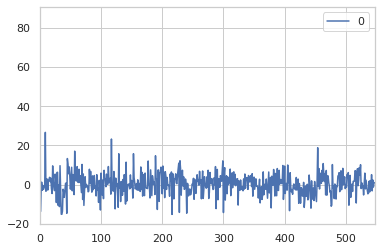

In [38]:
rolling_fcast = rolling_forecast(train, test, (10, 1, 0), (0, 0, 0, 1))

Mean Squared Error: 27.70206577750141
Root Mean Squared Error: 5.263275194923918
Mean Absolute Error: 4.087798192626383


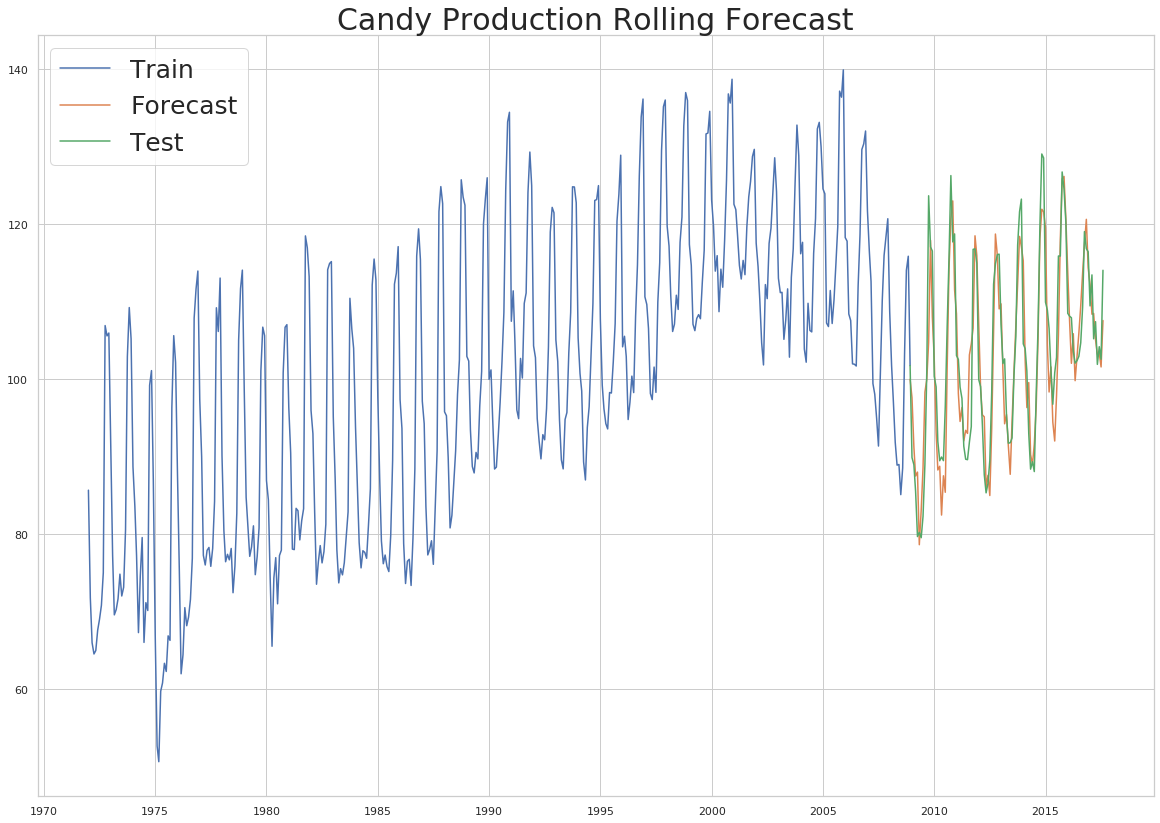

In [39]:
plt.figure(figsize=(20, 14))
plt.title('Candy Production Rolling Forecast', fontsize=30)
plt.plot(train, label='Train')
plt.plot(rolling_fcast['predictions'], label='Forecast')
plt.plot(test, label='Test')

print(f'Mean Squared Error: {rolling_fcast["mse"]}')
print(f'Root Mean Squared Error: {rolling_fcast["rmse"]}')
print(f'Mean Absolute Error: {rolling_fcast["mae"]}')
plt.legend(fontsize=25)
plt.show()

In [41]:
model = auto_arima(train, trace=True, start_p=0, start_q=0, start_P=0, start_Q=0,
                  max_p=10, max_q=10, max_P=10, max_Q=10, seasonal=True,
                  stepwise=False, suppress_warnings=True, D=1, max_D=10,
                  error_action='warn', approximation = False)

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=3242.421, BIC=3250.609, Fit time=0.013 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=3221.834, BIC=3234.115, Fit time=0.102 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=3186.240, BIC=3202.614, Fit time=0.125 seconds
Fit ARIMA: order=(0, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=3154.818, BIC=3175.286, Fit time=0.248 seconds
Fit ARIMA: order=(0, 1, 4) seasonal_order=(0, 0, 0, 1); AIC=3093.893, BIC=3118.454, Fit time=0.466 seconds
Fit ARIMA: order=(0, 1, 5) seasonal_order=(0, 0, 0, 1); AIC=3088.293, BIC=3116.948, Fit time=1.269 seconds
Fit ARIMA: order=(0, 1, 6) seasonal_order=(0, 0, 0, 1); AIC=3087.995, BIC=3120.743, Fit time=1.693 seconds
Fit ARIMA: order=(0, 1, 7) seasonal_order=(0, 0, 0, 1); AIC=3079.557, BIC=3116.399, Fit time=2.773 seconds
Fit ARIMA: order=(0, 1, 8) seasonal_order=(0, 0, 0, 1); AIC=3007.820, BIC=3048.756, Fit time=1.946 seconds
Fit ARIMA: order=(0, 1, 9) seasonal_o